# HW06
In HW06 we use web scraping of [List of S&P 500 companies](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) and [Yahoo Finance](https://finance.yahoo.com) to explore the S&P 500 companies.

Please start by downloading (right-click, save as) [HW06.ipynb](http://pages.stat.wisc.edu/~jgillett/365/06/HW06.ipynb).

Please budget time to run your HW06 on all 503 stocks in the S&P 500. My solution takes about 20 minutes; yours might take more or
less time depending on your code efficiency and your network
connection. My solution fails with a network timeout before
processing all 503 stocks about 1/3 of the time. You may submit a
solution that gets through only the first 50 stocks if you wish;
this will cost a 1-point penalty. I recommend developing your code
using about 3 stocks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

## Yuxuan Mei, 9077739374

## 1: Scrape the wikipedia page to get the S&P 500 stocks.
Write a function get_SP500_wikipedia_data() that reads
[List of S&P 500 companies](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) and
returns a DataFrame with these columns, sorted by 'Symbol':
- 'Symbol'
- 'Security'
- 'GICS Sector'
- 'Headquarters Location'

Hints:
- To retrieve the tables on that page, use pd.read_html(). Then select the required table and columns.
- To sort by 'Symbol', use df.sort_values(by='Symbol', ignore_index=True).

In [31]:
def get_SP500_wikipedia_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url)
    df = pd.DataFrame(tables[0])
    df = df[['Symbol','Security','GICS Sector','Headquarters Location']]
    df = df.sort_values(by='Symbol', ignore_index=True)
    return df

Here is some test code for the function:

In [32]:
df = get_SP500_wikipedia_data()
DPZ = df[df['Symbol'] == 'DPZ']
assert DPZ['Security'].iloc[0] == "Domino's Pizza"
assert DPZ['GICS Sector'].iloc[0] == 'Consumer Discretionary'
assert DPZ['Headquarters Location'].iloc[0] == 'Ann Arbor, Michigan'
df

,Symbol,Security,GICS Sector,Headquarters Location
0,A,Agilent Technologies,Health Care,"Santa Clara, California"
1,AAL,American Airlines Group,Industrials,"Fort Worth, Texas"
2,AAP,Advance Auto Parts,Consumer Discretionary,"Raleigh, North Carolina"
3,AAPL,Apple Inc.,Information Technology,"Cupertino, California"
4,ABBV,AbbVie Inc.,Health Care,"North Chicago, Illinois"
...,...,...,...,...
500,YUM,Yum! Brands Inc,Consumer Discretionary,"Louisville, Kentucky"
501,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana"
502,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois"
503,ZION,Zions Bancorp,Financials,"Salt Lake City, Utah"


## 2: Scrape information for a single stock from Yahoo Finance.
Write a function get_stock_data(symbol) that takes a stock symbol,
scrapes that symbol's [Yahoo Finance](https://finance.yahoo.com) page,
and returns a dictionary containing:
- 'Symbol': the passed-in symbol
- 'Market Cap'
- 'Beta (5Y Monthly)'
- 'Revenue (ttm)', key-statistics tab
- 'Total Cash (mrq)', key-statistics tab
- 'Avg Vol (3 month) 3', key-statistics tab (the last '3' indicates a footnote)
- '% Held by Insiders 1', key-statistics tab

Hint: For symbol='DPZ',
- 'Market Cap' and 'Beta (5Y Monthly)' are on the Summary tab at https://finance.yahoo.com/quote/DPZ. Use pd.read_html() to read the tables on this tab.
- 'Revenue (ttm)', 'Total Cash (mrq)', 'Avg Vol (3 month) 3', and '% Held by Insiders 1' are all on the Statistics tab at https://finance.yahoo.com/quote/DPZ/key-statistics. Use pd.read_html() to read the tables on this tab.

In [104]:
def get_stock_data(symbol):
    url1 = 'https://finance.yahoo.com/quote/' + symbol   
    url2 = 'https://finance.yahoo.com/quote/' + symbol + '/key-statistics'
    table1 = pd.read_html(url1)
    table2 = pd.read_html(url2)
    symbol = {'Symbol': symbol, 
         'Market Cap': table1[1].iloc[0, 1], 
         'Beta (5Y Monthly)]': table1[1].iloc[1, 1], 
         'Revenue (ttm)': table2[7].iloc[0,1], 
         'Total Cash (mrq)': table2[8].iloc[0,1], 
         'Avg Vol (3 month)': table2[2].iloc[0, 1], 
         '% Held by Insiders 1': table2[2].iloc[5, 1]}
    return symbol

Here is some test code for the function:

In [105]:
AMZN = get_stock_data(symbol='AMZN')
assert AMZN['Symbol'] == 'AMZN'
# I didn't make the following several print() statements assert
# statements because some of the values change. I would expect
# today's values to be reasonably close to the 4/15/21 values.
print(f"AMZN['Market Cap'] was 1.702T on 4/15/21. Now it is {AMZN['Market Cap']}")
print(f"AMZN['Revenue (ttm)'] was '386.06B' on 4/15/21. Now it is {AMZN['Revenue (ttm)']}")
print(f"AMZN['Total Cash (mrq)'] == '84.4B' on 4/15/21. Now it is {AMZN['Total Cash (mrq)']}")
print(f"AMZN['Avg Vol (3 month)'] == '3.58M' on 4/15/21. Now it is {AMZN['Avg Vol (3 month)']}")
print(f"AMZN['% Held by Insiders 1'] == '14.13%' on 4/15/21. Now it is {AMZN['% Held by Insiders 1']}")

AMZN['Market Cap'] was 1.702T on 4/15/21. Now it is 1.709T
AMZN['Revenue (ttm)'] was '386.06B' on 4/15/21. Now it is 84.4B
AMZN['Total Cash (mrq)'] == '84.4B' on 4/15/21. Now it is 66.06B
AMZN['Avg Vol (3 month)'] == '3.58M' on 4/15/21. Now it is nan
AMZN['% Held by Insiders 1'] == '14.13%' on 4/15/21. Now it is 0.00%


## 3: Scrape Yahoo Finance for all the S&P 500 stocks.
Write a function get_yahoo_finance_data(symbols) that:
- calls get_stock_data(symbol) on each of a list of symbols (we will call it on the S&P 500 list from the wikipedia page, but you should write it to accept any list)
- accumulates a list of dictionaries, one per symbol
- calls pd.DataFrame() on that list of dictionaries to make a DataFrame
- returns the DataFrame(), whose columns should be those mentioned in get_stock_data(symbol)

Hint: You will need to replace '.' by '-' in any symbol containing '.' to be able to read that symbol's Yahoo Finance page.

In [116]:
def get_yahoo_finance_data(symbols):
    list1 = []
    for i in range(len(symbols)):
        symbols[i]=symbols[i].replace('.','-')
        list1.append(get_stock_data(symbol = symbols[i]))
    dictionaries = pd.DataFrame(list1)
    return dictionaries

Here is some test code for the function:

In [117]:
get_yahoo_finance_data(symbols=['AMZN', 'DPZ', 'GME'])

,Symbol,Market Cap,Beta (5Y Monthly)],Revenue (ttm),Total Cash (mrq),Avg Vol (3 month),% Held by Insiders 1
0,AMZN,1.75T,1.12,386.06B,84.4B,3.49M,14.07%
1,DPZ,16.14B,0.45,4.12B,168.82M,636.52k,0.71%
2,GME,12.469B,-1.82,5.09B,508.5M,27.72M,19.42%


## 4: Write a utility function to convert dollar values represented as strings (which do not sort correctly, e.g. '1B' sorts before '1k' and '10' sorts before '9') to dollar values represented as floats.
Write a function money_string_to_number(s) according to its docstring, below. You will need it, below, when processing DataFrame columns that contain money amounts like '3.4B' (3.4 billion dollars) and '7.8k' (7800 dollars).

In [126]:
def money_string_to_number(s):
    """Returns float from money string s like '1.2T', '3.4B', '5.6M', or '7.8k'.

       To handle nan as an input, it first converts s to str(s).
       Then it makes these substitutions:
        'T' -> 'e12' (trillion)
        'B' -> 'e9' (billion)
        'M' -> 'e6' (million)
        'k' -> 'e3' (thousand)
       Then it uses float() to convert the string to float.
    """
    s=str(s)
    s=s.replace('T','e12')
    s=s.replace('B','e9')
    s=s.replace('M','e6')
    s=s.replace('k','e3')
    s=float(s)
    return s

Here is some test code for the function:

In [125]:
inputs = ('1.2T', '3.4B', '5.6M', '7.8k')
outputs = [money_string_to_number(s) for s in inputs]
correct = [1.2e12, 3.4e9, 5.6e6, 7.8e3]
assert np.allclose(outputs, correct)
assert np.isnan(money_string_to_number(np.nan))

## 5: Use get_SP500_wikipedia_data() and get_yahoo_finance_data() to make a DataFrame suitable for exploring the S&P 500 stocks.
Assemble a single DataFrame to use for exploring the S&P 500 stocks:
- Call df_wiki = get_SP500_wikipedia_data() to get a DataFrame from the wikipedia S&P 500 page.
- Call df_yahoo = get_yahoo_finance_data() on the 'Symbol' column from df_wiki.
- Call df = df_wiki.merge(right=df_yahoo, on='Symbol') to merge your two DataFrames into one.

Hint: While developing your code, use only the first three rows of df_wiki.

In [136]:
df_wiki = get_SP500_wikipedia_data()
df_yahoo = get_yahoo_finance_data(symbols = df_wiki['Symbol'])
df = df_wiki.merge(right=df_yahoo, on='Symbol')

Here is some test code for the previous block of code:

In [139]:
df.head(n=5)

,Symbol,Security,GICS Sector,Headquarters Location,Market Cap,Beta (5Y Monthly)],Revenue (ttm),Total Cash (mrq),Avg Vol (3 month),% Held by Insiders 1
0,A,Agilent Technologies,Health Care,"Santa Clara, California",40.875B,1.01,1.33B,1.22B,0.78,28.23%
1,AAL,American Airlines Group,Industrials,"Fort Worth, Texas",13.661B,1.93,14.04B,-6.2B,NaN,0.00%
2,AAP,Advance Auto Parts,Consumer Discretionary,"Raleigh, North Carolina",13.097B,1.36,834.99M,969.69M,4,14.01%
3,AAPL,Apple Inc.,Information Technology,"Cupertino, California",2.241T,1.29,107.16B,73.22B,3.28,24.08%
4,ABBV,AbbVie Inc.,Health Care,"North Chicago, Illinois",195.702B,0.81,8.49B,17.59B,5.2,173.53%


## 6: Use your DataFrame, df, to explore the S&P 500 companies and answer these questions.

Hint: Each of these questions requires only a few lines of code.

### 6a: Make a barplot showing the number of companies in each of the 11 sectors in the 'GICS Sector' column.

Hint: Rename the columns with long names so that they have reasonable names. e.g. Change 'Information Technology' to 'IT', 'Consumer Discretionary' to 'Discretionary', and so on.

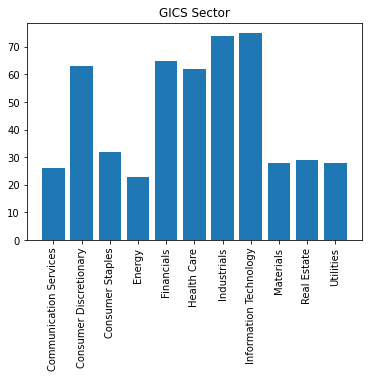

In [198]:
sector = df.groupby('GICS Sector').count()
plt.bar(sector.index,sector['Symbol'])
plt.xticks(rotation=90)
plt.title('GICS Sector')
plt.show()

### 6b: List the top ten companies according to 'Market Cap number'.

Hint: Do not use df['Market Cap'] directly, because its values are strings like '4.3k'
that will not sort correctly. Instead, use a list comprehension to call
money_string_to_number() on each value in df['Market Cap'] to make a new column,
like this:

df['Market Cap number'] = [money_string_to_number(s) for s in df['Market Cap']]   

Include the 'Symbol', 'Security', and 'Market Cap number' columns in your output.

In [161]:
df['Market Cap number'] = [money_string_to_number(s) for s in df['Market Cap']]
Top_10_cap = df.sort_values('Market Cap number', ascending = False)[0:10]
Top_10_cap = Top_10_cap[['Symbol', 'Security', 'Market Cap number']]
Top_10_cap

,Symbol,Security,Market Cap number
3,AAPL,Apple Inc.,2.241000e+12
318,MSFT,Microsoft Corp.,1.902000e+12
35,AMZN,Amazon.com Inc.,1.750000e+12
202,GOOG,Alphabet Inc. (Class C),1.631000e+12
203,GOOGL,Alphabet Inc. (Class A),1.620000e+12
176,FB,"Facebook, Inc.",9.362240e+11
445,TSLA,"Tesla, Inc.",6.498210e+11
70,BRK-B,Berkshire Hathaway,6.380250e+11
465,V,Visa Inc.,5.222410e+11
257,JPM,JPMorgan Chase & Co.,4.697760e+11


### 6b: List the top ten companies according to 'Revenue (ttm) number'.

Hint: Use money_string_to_number() again to make a new column of floats.

Include the 'Symbol', 'Security', and 'Revenue (ttm) number' columns in your output.#   - 'Revenue (ttm)'

In [164]:
df['Revenue (ttm) number'] = [money_string_to_number(s) for s in df['Revenue (ttm)']]
Top_10_rev = df.sort_values('Revenue (ttm) number', ascending = False)[0:10]
Top_10_rev = Top_10_rev[['Symbol', 'Security', 'Revenue (ttm) number']]
Top_10_rev

,Symbol,Security,Revenue (ttm) number
257,JPM,JPMorgan Chase & Co.,1.530000e+12
74,C,Citigroup Inc.,1.000000e+12
55,BAC,Bank of America Corp,9.158900e+11
208,GS,Goldman Sachs Group,5.660000e+11
316,MS,Morgan Stanley,5.148700e+11
483,WFC,Wells Fargo,4.644500e+11
63,BK,The Bank of New York Mellon,2.004200e+11
70,BRK-B,Berkshire Hathaway,1.382900e+11
203,GOOGL,Alphabet Inc. (Class A),1.351000e+11
202,GOOG,Alphabet Inc. (Class C),1.351000e+11


### 6c: List the top ten companies according to 'Total Cash (mrq) number'.

Hint: Use money_string_to_number() again to make a new column of floats.

Include the 'Symbol', 'Security', and 'Total Cash (mrq) number' columns in your output.

In [166]:
df['Total Cash (mrq) number'] = [money_string_to_number(s) for s in df['Total Cash (mrq)']]
Top_10_cash = df.sort_values('Total Cash (mrq) number', ascending = False)[0:10]
Top_10_cash = Top_10_cash[['Symbol', 'Security', 'Total Cash (mrq) number']]
Top_10_cash

,Symbol,Security,Total Cash (mrq) number
3,AAPL,Apple Inc.,7.322000e+10
202,GOOG,Alphabet Inc. (Class C),7.296000e+10
203,GOOGL,Alphabet Inc. (Class A),7.296000e+10
318,MSFT,Microsoft Corp.,7.270000e+10
35,AMZN,Amazon.com Inc.,6.606000e+10
428,T,AT&T Inc.,4.419000e+10
476,VZ,Verizon Communications,4.264000e+10
70,BRK-B,Berkshire Hathaway,3.977000e+10
176,FB,"Facebook, Inc.",3.875000e+10
488,WMT,Walmart,3.607000e+10


### 6d: List the top ten companies according to 'Avg Vol (3 month) number'.

Hint: Use money_string_to_number() again to make a new column of floats.

Include the 'Symbol', 'Security', and 'Avg Vol (3 month) number' columns in your output.

In [167]:
df['Avg Vol (3 month) number'] = [money_string_to_number(s) for s in df['Avg Vol (3 month)']]
Top_10_vol = df.sort_values('Avg Vol (3 month) number', ascending = False)[0:10]
Top_10_vol = Top_10_vol[['Symbol', 'Security', 'Avg Vol (3 month) number']]
Top_10_vol

,Symbol,Security,Avg Vol (3 month) number
66,BLK,BlackRock,16.52
49,AVGO,Broadcom Inc.,14.40
160,EQIX,Equinix,11.48
280,LMT,Lockheed Martin Corp.,10.40
163,ESS,"Essex Property Trust, Inc.",8.36
381,PSA,Public Storage,8.00
32,AMGN,Amgen Inc.,7.04
215,HD,Home Depot,6.60
231,IBM,International Business Machines,6.56
48,AVB,AvalonBay Communities,6.36


### 6e: List the top ten companies according to '% Held by Insiders 1 number'.

Hint: To sort by number and not by string, first create a new column
'% Held by Insiders 1 number' from '% Held by Insiders 1' by converting
to string, stripping the '%' from a string like '1.23%' and then
converting to float.

Include the 'Symbol', 'Security', and '% Held by Insiders 1 number' columns in your output.

In [172]:
def money_string_to_number_2(s):
    s=str(s)
    s=s.replace('%','')
    s=s.replace('T','e12')
    s=s.replace('B','e9')
    s=s.replace('M','e6')
    s=s.replace('k','e3')
    s=s.replace(',','')
    s=float(s)
    return s

In [173]:
df['% Held by Insiders 1 number'] = [money_string_to_number_2(s) for s in df['% Held by Insiders 1']]
Top_10_percent_held = df.sort_values('% Held by Insiders 1 number', ascending = False)[0:10]
Top_10_percent_held = Top_10_percent_held[['Symbol', 'Security', '% Held by Insiders 1 number']]
Top_10_percent_held

,Symbol,Security,% Held by Insiders 1 number
196,GILD,Gilead Sciences,2720.00
16,AES,AES Corp,955.33
487,WMB,Williams Companies,941.18
392,REG,Regency Centers Corporation,915.38
456,UDR,"UDR, Inc.",720.00
182,FIS,Fidelity National Information Services,560.00
261,KHC,Kraft Heinz Co,551.72
359,PEAK,Healthpeak Properties,548.15
136,DLR,Digital Realty Trust Inc,448.00
437,TJX,TJX Companies Inc.,328.57


### 6f: List the top ten companies according to 'Beta (5Y Monthly) number'.

Hint: Use money_string_to_number() again to make a new column of floats.

Include the 'Symbol', 'Security', and 'Beta (5Y Monthly) number' columns in your output.

In [176]:
df['Beta (5Y Monthly) number'] = [money_string_to_number(s) for s in df['Beta (5Y Monthly)]']]
Top_10_beta = df.sort_values('Beta (5Y Monthly) number', ascending = False)[0:10]
Top_10_beta = Top_10_beta[['Symbol', 'Security', 'Beta (5Y Monthly) number']]
Top_10_beta

,Symbol,Security,Beta (5Y Monthly) number
41,APA,APA Corporation,4.96
146,DVN,Devon Energy,3.35
315,MRO,Marathon Oil Corp.,3.24
122,CZR,Caesars Entertainment,3.20
210,HAL,Halliburton Co.,2.92
390,RCL,Royal Caribbean Group,2.90
324,NCLH,Norwegian Cruise Line Holdings,2.88
174,FANG,Diamondback Energy,2.74
361,PENN,Penn National Gaming,2.68
354,OXY,Occidental Petroleum,2.53


### 6g: Make a histogram of the values of 'Beta (5Y Monthly)'.

In [192]:
beta = df['Beta (5Y Monthly) number'].array
beta

<PandasArray>
[1.01, 1.93, 1.36, 1.29, 0.81, 0.54, 1.31,  0.7,  1.1, 0.95,
 ...
 0.29, 1.03, 1.41, 0.93, 1.03, 1.02, 1.33, 1.63, 1.59, 0.62]
Length: 505, dtype: float64

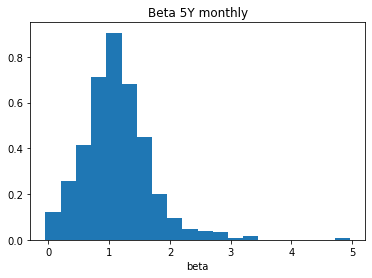

In [201]:
plt.hist(beta, bins=20, density=True)
plt.title('Beta 5Y monthly')
plt.xlabel('beta')
plt.show()

### 6h: Find the average value of 'Beta (5Y Monthly) number'.

In [209]:
print(f' The average value of beata 5Y monthly is {beta.mean()}')

 The average value of beata 5Y monthly is 1.1319076305220885


### 6i Display the only company with a negative value for 'Beta (5Y Monthly) number '.
Answer by giving its value for 'Security'.

In [233]:
beta_sorted = df.sort_values(by=['Beta (5Y Monthly) number'], axis=0, ascending=True)
beta_sorted.iloc[0,1]

'Hormel Foods Corp.'

### 6j: Make a barplot of 'Headquarters Location' (by city).
Show the number of companies in each of the top ten cities.

In [296]:
city=[]
for i in range(len(df['Headquarters Location'])):
    city.append(re.sub(pattern='(.*)\, .*',repl='\\1',string=df['Headquarters Location'][i] ))

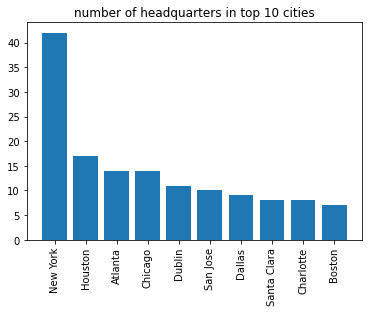

In [299]:
city_hq = pd.DataFrame(city)
city_hq = city_hq.rename(columns={0:'city'})
city_hq['count']=0
city_hq = city_hq.groupby('city').count().sort_values('count',ascending=False)[0:10]
plt.bar(city_hq.index, city_hq['count'])
plt.xticks(rotation=90)
plt.title('number of headquarters in top 10 cities')
plt.show()

### 6k: Make a barplot of 'Headquarters Location' by state.
Show the number of companies in each of the top ten states.

Hint: Use a regular expression to strip the city from 'Headquarters Location'
to get the state.

In [261]:
state=[]
for i in range(len(df['Headquarters Location'])):
    state.append(re.sub(pattern='.*\, (.*)',repl='\\1',string=df['Headquarters Location'][i] ))

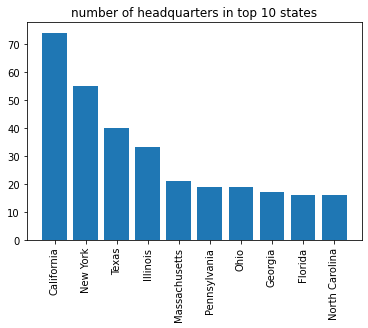

In [298]:
state_hq = pd.DataFrame(state)
state_hq = state_hq.rename(columns={0:'state'})
state_hq['count']=0
state_hq = state_hq.groupby('state').count().sort_values('count',ascending=False)[0:10]
plt.bar(state_hq.index, state_hq['count'])
plt.xticks(rotation=90)
plt.title('number of headquarters in top 10 states')
plt.show()